## Problem 4 - Deconvolution of the Haemodynamic Response

Neuronal activity causes local changes in deoxyhemoglobin concentration in the blood, which can be measured using magnetic resonance imaging (MRI).he haemodynamic response is both delayed and slower than the underlying neural responses. We can model the delay and spread of the measurements relative to the neural signals using a linear shift-invariant system: $$r(n)= ∑x(n-k)h(k)$$ Where x(n) is an input signal delivered over time (for example, a sequence of light intensities), h(k) is the haemodynamic response to a single light flash at time k = 0 (i.e., the impulse response of the MRI measurement), and r(n) is the MRI response to the full input signal.

In [3]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fftpack import fft,fftfreq,fftshift 
#Load given data 
load_data = loadmat('hrfDeconv.mat')
mri_out = load_data['r'][:,0]
data_in = load_data['x'][:,0]

Text(0.5, 1.0, 'Output vector - r')

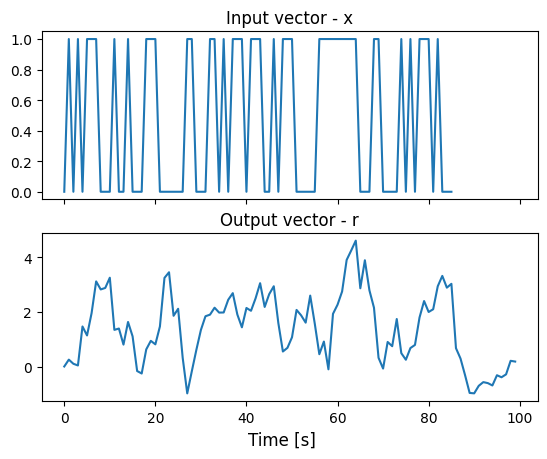

In [4]:
fig,axs = plt.subplots(2,1,sharex=True)
fig.supxlabel('Time [s]')
axs[0].plot(data_in)
axs[0].set_title('Input vector - x')
axs[1].plot(mri_out)
axs[1].set_title('Output vector - r')


The created function passed all random tests, matrix multiplication is equivalent to applying the python convolve function 


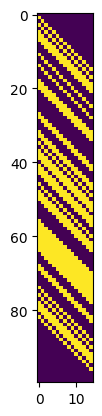

In [6]:
# a)  function createConvMat, that takes as arguments an input vector x and M (the dimensionality of h) and generates a matrix X such that the response r = Xh
def createConvMat(input_vect,filter_dim):
    convMat = np.zeros((len(input_vect)+filter_dim-1,filter_dim))
    for i in range(filter_dim):
        convMat[i:i+len(input_vect),i] = input_vect
    return convMat

# Convolution Matrix
input_convMat = createConvMat(data_in,15)

# Test that te convolution matrix provides the same results as the python function
results = [] 
for i in range(3): # Test for three different random h vectors
    h=np.random.random((15,1))
    if np.allclose((input_convMat@h)[:,0],np.convolve(data_in,h[:,0])):
        results.append(True)
    else: 
        results.append(False)

if np.all(results):
    print('The created function passed all random tests, matrix multiplication is equivalent to applying the python convolve function ')

#Visualize matrix X as an image
plt.imshow(input_convMat,cmap= 'Greys')


Text(0.5, 0, 'time (s)')

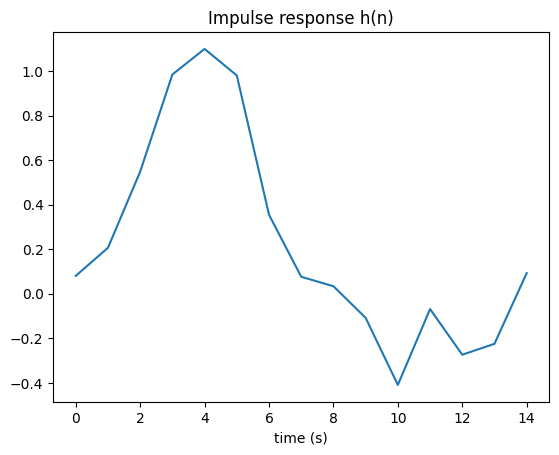

In [8]:
# b) Given the X generated by our function, and taking into account the algebraic analitical solution for least-squares regression.
X = input_convMat
X_t = input_convMat.transpose()
h_opt = la.inv(X_t@X)@X_t@mri_out
plt.plot(h_opt)
plt.title('Impulse response h(n)')
plt.xlabel('time (s)')

I would describe this input response as a filter that weights strongly the data of the first 6 seconds, and diminishes the response of later samples from 7 to 14 seconds. 

Text(0.5, 0, 'Frequency [Hz]')

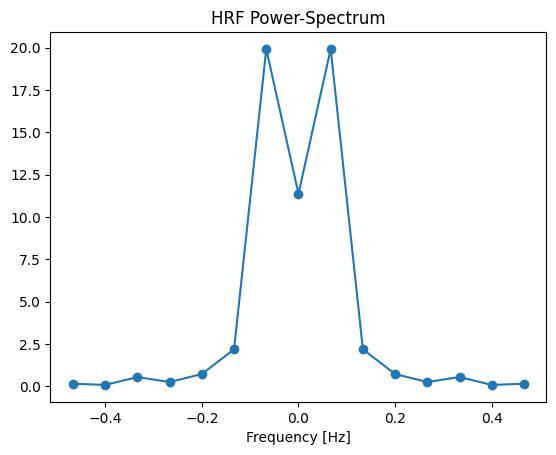

In [9]:
N = len(h_opt)
T = 1.0 # Period = 1/freq --> freq = 1 Hz
h_fft = fftshift(fft(h_opt))
h_psd = np.abs(h_fft)**2
xf = fftshift(fftfreq(N, T))

plt.plot(xf, h_psd,'o-')
plt.title('HRF Power-Spectrum')
plt.xlabel('Frequency [Hz]')

Based on the frequency response we can say that that HRF is a low-pass filter witha a cut off frequency of approximately 0.1 Hz. This means that the filter blocks frequencies greater than the cut off and it lets the frequencies smaller than the cut off pass.